# HW 5

In [1]:
import matplotlib.pyplot as plt

import trees as t
import fun_one as fo
import fun_two as ft
import fun_three as f3
import fun_four as ff

## 1. Data
We implemented all this part in the trees module but we want to say here a couple of things:
- we use dates considering only day-date-year, so when we convert timestamps we "discard" the time part;
- We have decided to ignore the "self-interaction" because we think interactions with oneself are not relevant;
- We choose different intervals of time in order to show significant results taking into account computational time.

## 2/3. Functionalities and Visualization
Here we deal with the four functionalities and their visualization

### Functionality 1
We build the graph and then we pass it to fun1 that accomplish all the requested tasks and return a table with results.
For "undirected" graph we mean that each couple of nodes linked by an edge in one direction has also another link in the opposite direction

In [32]:
f = 'a2q'
graph = t.build(f, '2012-01-01', '2012-01-07')
print(graph)

DiGraph with 27076 nodes and 36458 edges


In [33]:
res = fo.fun1(graph)
res

,result
directed?,yes
N° of users,27076
N° of answers,36458
average,1.346506
density,0.0001
sparse?,yes


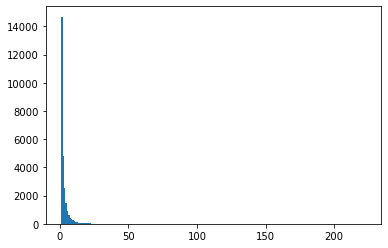

In [34]:
fo.plot_degree_dist(graph)

This is a "strange" graph but this is due to the high degrees of a very small number of nodes, for example: we have a node with degree of 224 and this makes plot "larger" to represent also this node, we could have decided not to represent it but we would have represented something that no longer corresponded to the original graph so we decided to not manipulate anything.

### Functionality 2
We solve this functionality according to the following formulas:
##### Betweenness centrality
Let $n_{s,t}^{v}$ be the number of shortest paths from $s$ to $t$ that pass through $v$ and let $n_{s,t}$ be the total number of shortest paths from $s$ to $t$. Then the betweenness centrality of node $v$ is:

$\displaystyle{B(v) = \sum_{s, t} \frac{n_{s,t}^{v}}{n_{s,t}}}$

##### Closeness centrality
$C(v)={\frac  {N-1}{\sum _{u}d(u,v)}}$
- N is the number of total nodes in the graph
- $d(u,v)$ is the shortest path distance between the nodes u and v

##### Degree Centrality
$D(v)={\frac  {degree(v)}{N-1}}$

##### Page rank
To compute the pagerank algorithm:
- We start from select at random a starting node;
- Then we initialize the $q_0$ vector, such that all of his components are equal to 0, except for the component relative to the starting node, which is equal to 1;
- for each step t of the algorithm we compute: $q_t = q_{(t-1)} * P$ and we check if the algorithm converges;
- if the algorithm have converged we return the number of iterations needed and the page rank value relative to the node $v$ in input.

Note that we have used a different interval for the print of the betweenness because the running time of this metric is high, so we search for a time interval with maximum 100 nodes. Instead for the other metrics, we used a different time interval with 1500 nodes.

In [36]:
# Show the functionality two with betweenness metric
print(ft.fun2(49, "2008-08-01", "2008-08-04", "Betweeness"))

100%|██████████| 98/98 [00:05<00:00, 19.19it/s]

0.1268472906403941


In [ ]:
# Show the functionality two with closeness metric
print(ft.fun2(3347, "2008-09-01", "2008-09-06", "ClosenessCentrality"))

100%|██████████| 1523/1523 [02:31<00:00, 10.07it/s]

0.25822870715982355


In [ ]:
# Show the functionality two with pagerank metric
print(ft.fun2(3347, "2008-09-01", "2008-09-06", "PageRank", alpha=0.85, max_iter=100, tol = 0.000001))

 12%|█▏        | 12/100 [00:00<00:00, 140.30it/s]

the algorithm Page rank converges in  12 iterations
0.0010742618150226557


In [ ]:
# Show the functionality two with degree centrality metric
print(ft.fun2(3347, "2008-09-01", "2008-09-06", "DegreeCentrality"))

0.01445466491458607


#### Visualization part

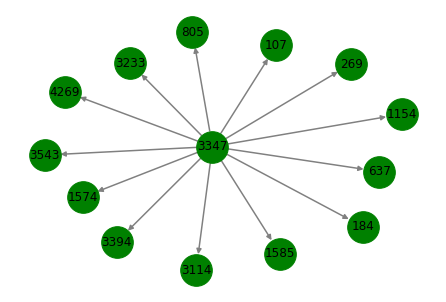

In [ ]:
# Visualization of the importance of node 3347 used for the prints of the closeness, pagerank and degree scores
ft.vis2(3347, "2008-09-01", "2008-09-06")

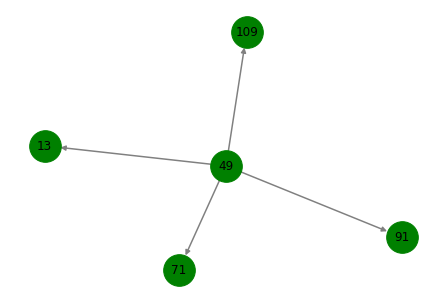

In [ ]:
# Visualization of the importance of node 49 used for the prints of the betweennes
ft.vis2(49, "2008-08-01", "2008-08-04")

##### Evolution of the Page rank and DegreeCentrality
- We split the interval from 1-09-2008 to 06-09-2008 into 3 intervals of two days each.
- We can see that the user 3347 has more pagerank score and degree centrality score in the second interval (3-4 september 2008)
- In addition, the user 3347 has smallest pagerank score in the third interval, and differently has the smallest degree score in the first interval

 11%|█         | 11/100 [00:00<00:00, 230.35it/s]


the algorithm Page rank converges in  11 iterations


 20%|██        | 20/100 [00:00<00:00, 612.15it/s]


the algorithm Page rank converges in  20 iterations


 10%|█         | 10/100 [00:00<00:00, 357.94it/s]

the algorithm Page rank converges in  10 iterations
0.0014757649433329912  is the value of the Pagerank for 1-2 settembre 2008
0.0031540943459823024  is the value of the Pagerank for 3-4 settembre 2008
0.0007977482829770693  is the value of the Pagerank for 5-6 settembre 2008


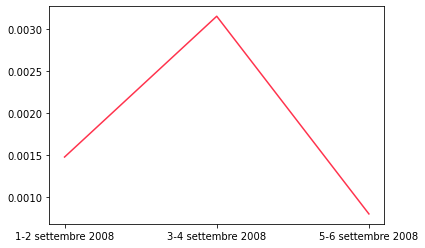

In [ ]:
y = list()
i = ft.fun2(3347, "2008-09-01", "2008-09-02", "PageRank", alpha=0.85, max_iter=100, tol = 0.000001)
j = ft.fun2(3347, "2008-09-03", "2008-09-04", "PageRank", alpha=0.85, max_iter=100, tol = 0.000001)
z = ft.fun2(3347, "2008-09-05", "2008-09-06", "PageRank", alpha=0.85, max_iter=100, tol = 0.000001)

y.append(i)
y.append(j)
y.append(z)

print(i, " is the value of the Pagerank for 1-2 settembre 2008")
print(j, " is the value of the Pagerank for 3-4 settembre 2008")
print(z, " is the value of the Pagerank for 5-6 settembre 2008")


fig = plt.figure()
ax = plt.axes()

x = ["1-2 settembre 2008", "3-4 settembre 2008", "5-6 settembre 2008"]
ax.plot(x, y, color = (1.0,0.2,0.3));

0.0024330900243309003  is the value of the DegreeCentrality for 1-2 settembre 2008
0.016793893129770993  is the value of the DegreeCentrality for 3-4 settembre 2008
0.0046801872074883  is the value of the DegreeCentrality for 5-6 settembre 2008


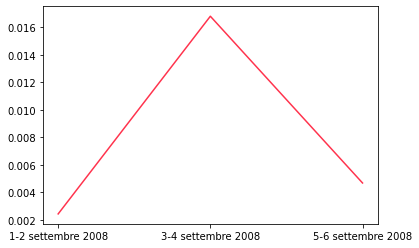

In [ ]:
y = list()
i = ft.fun2(3347, "2008-09-01", "2008-09-02", "DegreeCentrality")
j = ft.fun2(3347, "2008-09-03", "2008-09-04", "DegreeCentrality")
z = ft.fun2(3347, "2008-09-05", "2008-09-06", "DegreeCentrality")

y.append(i)
y.append(j)
y.append(z)

print(i, " is the value of the DegreeCentrality for 1-2 settembre 2008")
print(j, " is the value of the DegreeCentrality for 3-4 settembre 2008")
print(z, " is the value of the DegreeCentrality for 5-6 settembre 2008")


fig = plt.figure()
ax = plt.axes()

x = ["1-2 settembre 2008", "3-4 settembre 2008", "5-6 settembre 2008"]
ax.plot(x, y, color = (1.0,0.2,0.3));

### Functionality 3

In [5]:
graph = t.build('a', '2010-01-01', '2010-01-07')
print(graph)

DiGraph with 10786 nodes and 29430 edges


We will compute the shortest path between each node and his following, so we are sure that the path visits the nodes in p in order. Then we will join all the different paths and we will obtain the shortest path between $p_1$ and $p_n$ that visits in order all the nodes in p.

Here we consider $p_1,\,p_n$ and $p$ as follows because we are sure they return a complete path

In [37]:
p1 =202019
pn = 227411
p = [235648, 46724, 232279, 117859, 147095]

[(202019, 46724), (46724, 235648), (235648, 46724), (46724, 235648), (235648, 58635), (58635, 167735), (167735, 26327), (26327, 69755), (69755, 242177), (242177, 161640), (161640, 232279), (232279, 117859), (117859, 110603), (110603, 32914), (32914, 84704), (84704, 198729), (198729, 223196), (223196, 147095), (147095, 223196), (223196, 18936), (18936, 198707), (198707, 227411)]


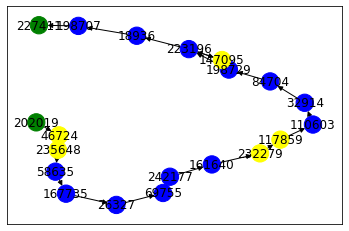

In [39]:
f3.vis3('2010-01-01','2010-01-07', p, p1, pn)

The plot show us the shortest path that goes from $p_1$ to $p_n$ (green nodes in the path) and visit in order the nodes in p (yellow ones in the path).

In the cells below we will see another test with the choose of $p_1$, $p$ and $p_n$ randomly

In [6]:
p1 = f3.selectRandom(list(graph.nodes))
pn = f3.selectRandom(list(graph.nodes))
p = f3.selectRandomSeq(list(graph.nodes)).tolist()
print("p1: ", p1, "\tpn: ", pn, "\tp: ", p)

p1:  242524 	pn:  243749 	p:  [243370, 21299, 30453, 216288, 649]


In [7]:
f3.vis3('2010-01-01','2010-01-07', p, p1, pn)

'Not possible'

### Functionality 4

- The maximum flow and minimum cut theorem says that, in a flow network, the maximum flow passing from the source to the target is equal to the sum of the weights of the edges in the minimum cut. Then, to find the minimum cut between two nodes, we consider the FordFulkerson algorithm, which returns the max flow of a graph.
- We build the algorithm such that while exists a path between the source and the target in input, we calculate the path flow as the minimum of the weight of the path edges, then we will subtract this path_flow to the edges that are in the path.  
- We count the number of edges that are in minimum cut considering the edges that have weight equal to 0 (as we have subtracted before path_flow to the edges in tha path).

In [43]:
ff.fun4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 1600, 136)

'The nodes in input should be unique for each interval'

In [44]:
ff.fun4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 3877, 357)

4

#### Visualization part
Show a visualization of the links needed to be removed in order to disconnect both graphs.
1. The link needed to be removed in order to disconnect the graphs are the red edges; 
2. In order to give a better idea we also plot in black the edges that are in the path between user_1 and user_2 and that are not removed because we only removed the minimum number of edges needed to disconnect the two graphs (w.r.t. weight);
3. In case the number of edges of the path and the number of edges needed to be removed is equal, to give a more general idea of the graph, we add to the plot 3 neighbor edges for each node in the plot.

[[797, 3404], [1600, 797]]


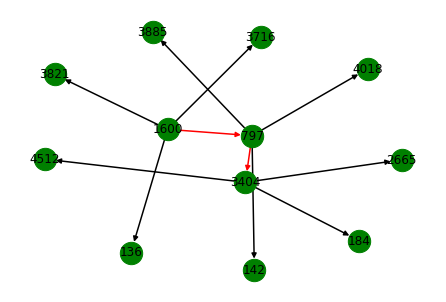

In [2]:
ff.vis4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 1600, 3404)

[[1463, 370899], [3877, 3869], [3869, 1463]]


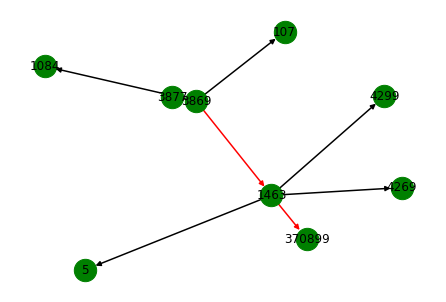

In [8]:
ff.vis4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 3877, 370899)

[[3869, 1463], [3877, 3869], [4299, 357], [1463, 4299]]


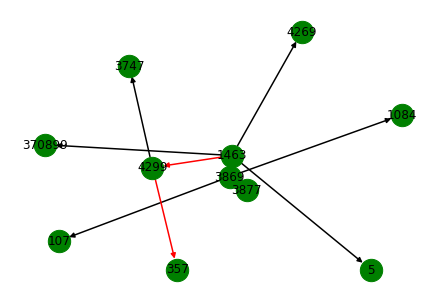

In [9]:
ff.vis4("2008-09-01", "2008-09-03", "2008-09-04", "2008-09-06", 3877, 357)

## Algorithmic question

Our approach to the problem is the following: for each couple in the list of kids that fight we assign the two kids in two different dormitories in the simplest case, instead if one of the two kids has already been assigned we try to place the other one in the other dormitory but if in this dormitory there is already a third kid that fight with him we return False because we are not able to split kids in a way that avoid fights.<br>
When it is possible to split kids in two different group and avoid fights we return a list in wich each position refers to a kid (position 0 -> kid 1, pos 1 -> kid 2...) and the number stored in that position is the dormitory to which it was assigned, if the number is 0 means that the kid can be assigned indifferently to the first or second dormitory because he does not cause conflicts.

In [11]:
def solve(n, l):
    # Initialize the list in which is stored the split of the kids
    d = [0] * n

    # It loops on the list of the kids that fight
    for el in l:
        # Scale indexes because list d starting from position 0
        f = el[0] - 1
        s = el[1] -1

        if f == s:
            return ("A kid can't fight with himself")
        if d[f] == 0 and d[s] == 0:
            # If neither has been assigned
            d[f] = 1
            d[s] = 2
        elif d[f] == 0:
            # If the first kid has been assigned -> assign the second one to the other dormitory
            if d[s] == 1:
                d[f] = 2
            else:
                d[f] = 1
        elif d[s] == 0:
            # If the second kid has been assigned -> assign the first one to the other dormitory
            if d[f] == 1:
                d[s] = 2
            else:
                d[s] = 1
        elif d[f] == d[s]:
            # If both of them have been assigned at the same dormitory we can't change
            # their assignment because this would at the same way interfere with
            # the previous assignments as one of the two kids could find another kid in the other dormitory to fight
            return False

    return d

n = 10    
pairs_no = [(1,3), (3,4), (1,4)]
pairs_yes = [(1,2), (3,4), (4,5), (5,8), (1,10)]
print(solve(n, pairs_no))
print(solve(n, pairs_yes))

False
[1, 2, 1, 2, 1, 0, 0, 2, 0, 2]
